# Regression Analysis

### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as st
plt.style.use('fivethirtyeight')
import warnings
from pylab import rcParams
import statsmodels.api as sm

### 2. Loading the data

In [2]:
stocks_data = pd.read_csv('/Users/usmanali/Uwindsor/Forth/Project/Data Collection/Historic Data of Economical Indicators/Stock Exchange Index.csv')
RD_spending_data = pd.read_csv('/Users/usmanali/Uwindsor/Forth/Project/Data Collection/Historic Data of Economical Indicators/R&D Spending in Canada.csv')
productivity_data = pd.read_csv('/Users/usmanali/Uwindsor/Forth/Project/Data Collection/Historic Data of Economical Indicators/Labour Productivity rate.csv')
gdp = pd.read_csv('/Users/usmanali/Uwindsor/Forth/Project/Data Collection/Historic Data of Economical Indicators/GDP.csv')
cpi = pd.read_csv('/Users/usmanali/Uwindsor/Forth/Project/Data Collection/Historic Data of Economical Indicators/CPI.csv')

### 3. Data Cleaning

In [103]:
#Stock Data Cleaning
stocks_data1 = stocks_data.copy()
#Get the related columns
stocks_data1 = stocks_data1[['REF_DATE','VALUE']]
#Transform the data
stocks_data1['Date'] = pd.to_datetime(stocks_data1['REF_DATE'])
#Get the mean values
stocks_data1 = round(stocks_data1.groupby(['Date'])['VALUE'].mean(),2).reset_index()
stocks_data1 = stocks_data1.rename(columns= {'VALUE': "stock_value"})
stocks_data1

,Date,stock_value
0,1956-05-01,560.09
1,1956-06-01,575.39
2,1956-07-01,617.67
3,1956-08-01,603.75
4,1956-09-01,566.99
5,1956-10-01,554.02
6,1956-11-01,524.63
7,1956-12-01,564.97
8,1957-01-01,568.14
9,1957-02-01,545.24


In [4]:
#R&D data cleaning
RD_spending_data1 = RD_spending_data.copy()
#Data for canada
RD_spending_data1 = RD_spending_data1[RD_spending_data1['Country Name'] == 'Canada']

#Relevent columns
RD_spending_data1 = RD_spending_data1.drop(['Country Code','Indicator Name','Indicator Code'], axis= 1)
#Drop null values
RD_spending_data1.dropna(axis=1,inplace=True)
#Get the same columns for date
RD_spending_data1 = pd.melt(RD_spending_data1, id_vars=["Country Name"], var_name="Year", value_name="Value")
#Get the related columns
RD_spending_data1 = RD_spending_data1[['Year','Value']]
RD_spending_data1['Year'] = pd.to_datetime(RD_spending_data1['Year'])
RD_spending_data1 = RD_spending_data1.rename(columns = {'Value' : 'R&D Spending'})
RD_spending_data1

,Year,R&D Spending
0,1996-01-01,1.606820
1,1997-01-01,1.613860
2,1998-01-01,1.710510
3,1999-01-01,1.749850
4,2000-01-01,1.858480
5,2001-01-01,2.021170
6,2002-01-01,1.971710
7,2003-01-01,1.967810
8,2004-01-01,1.997340
9,2005-01-01,1.971270


In [5]:
#Productivity data cleaning
productivity_data1 = productivity_data.copy()
#Get the specific data and columns by filtering
productivity_data1 = productivity_data1[productivity_data1['Industry'] == 'Finance and insurance, and holding companies [BS5B]'][['REF_DATE','VALUE']]

productivity_data1 = productivity_data1.reset_index()[['REF_DATE','VALUE']]
productivity_data1['REF_DATE'] = pd.to_datetime(productivity_data1['REF_DATE'], format = '%Y')
productivity_data1 = productivity_data1.rename(columns = {'VALUE' : 'labour_productivity'})
productivity_data1

,REF_DATE,labour_productivity
0,1997-01-01,50.0
1,1998-01-01,53.4
2,1999-01-01,53.5
3,2000-01-01,53.1
4,2001-01-01,54.9
5,2002-01-01,57.4
6,2003-01-01,57.8
7,2004-01-01,58.0
8,2005-01-01,58.1
9,2006-01-01,61.0


In [6]:
#GDP Data Cleaning
gdp1 = gdp.copy()
gdp1 = gdp1[gdp1['North American Industry Classification System (NAICS)'] == 'Finance and insurance [52]'][['REF_DATE','VALUE']]

#Covert into datetime
gdp1['Date'] = pd.to_datetime(gdp1['REF_DATE'])

gdp1 = gdp1.groupby(['Date'])['VALUE'].mean().reset_index()
gdp1 = gdp1.rename(columns = {'VALUE':'GDP'})
gdp1

,Date,GDP
0,1997-01-01,67302.0
1,1997-02-01,68039.0
2,1997-03-01,67991.0
3,1997-04-01,67894.0
4,1997-05-01,68419.0
...,...,...
320,2023-09-01,157149.0
321,2023-10-01,157908.0
322,2023-11-01,157728.0
323,2023-12-01,158928.0


In [7]:
#CPI Data Cleaning
cpi1 = cpi
cpi1 = cpi1[cpi1['Products and product groups'] == 'All-items'][['REF_DATE','VALUE']]
cpi1['Date'] = pd.to_datetime(cpi1['REF_DATE'], format = '%Y')
cpi1 = cpi1[['Date','VALUE']]
cpi1 = cpi1.rename(columns = {'VALUE' : 'CPI'})
cpi1

,Date,CPI
0,1950-01-01,12.5
1,1951-01-01,13.8
2,1952-01-01,14.2
3,1953-01-01,14.0
4,1954-01-01,14.1
...,...,...
69,2019-01-01,136.0
70,2020-01-01,137.0
71,2021-01-01,141.6
72,2022-01-01,151.2


### Time Series Modeling

In [108]:
# Date as Index
stocks_data1.set_index('Date', inplace= True)
RD_spending_data1.set_index('Year',inplace=True)
productivity_data1.set_index('REF_DATE',inplace=True)
gdp1.set_index('Date',inplace=True)
cpi1.set_index('Date',inplace=True)

KeyError: "None of ['Date'] are in the columns"

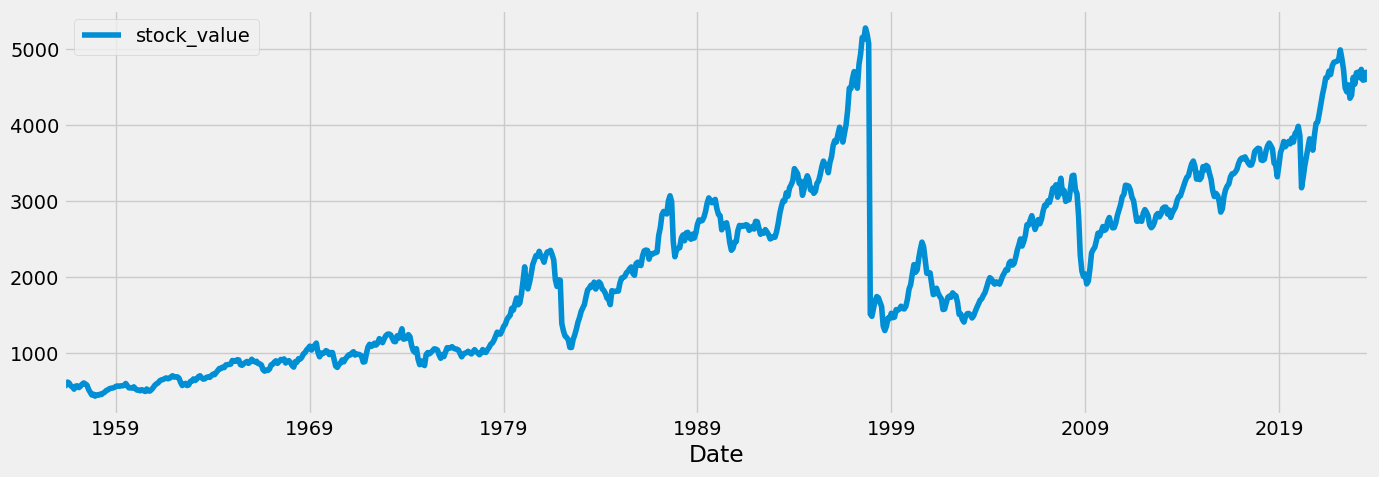

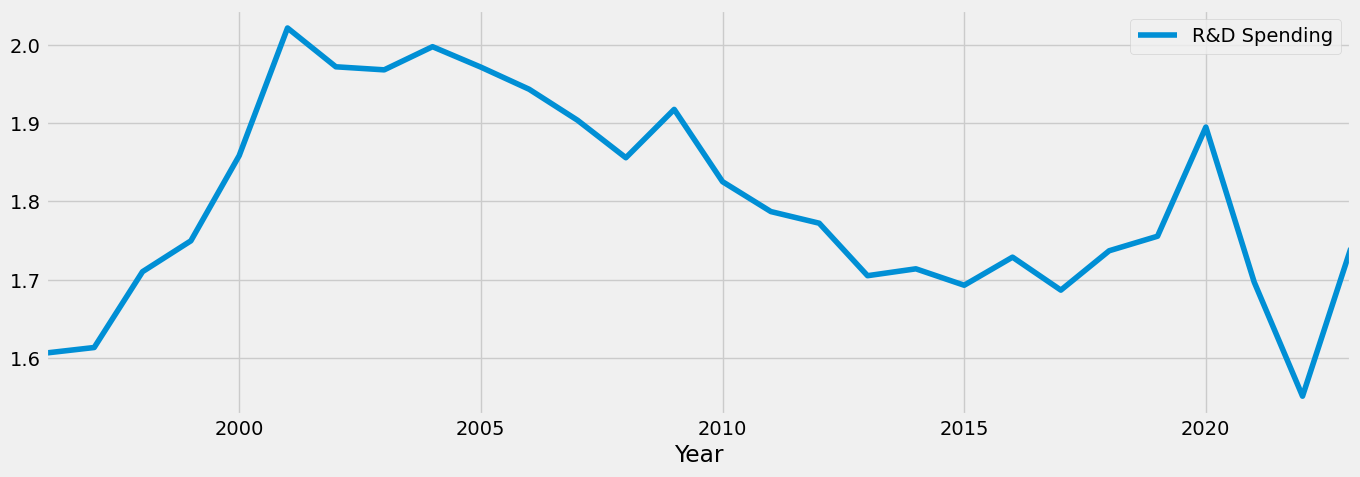

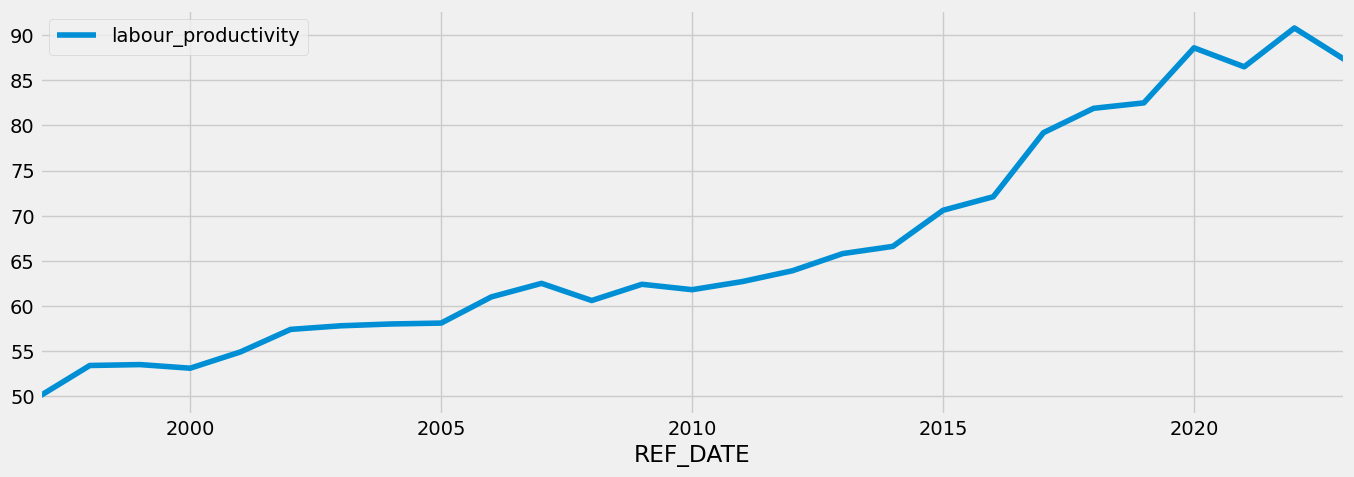

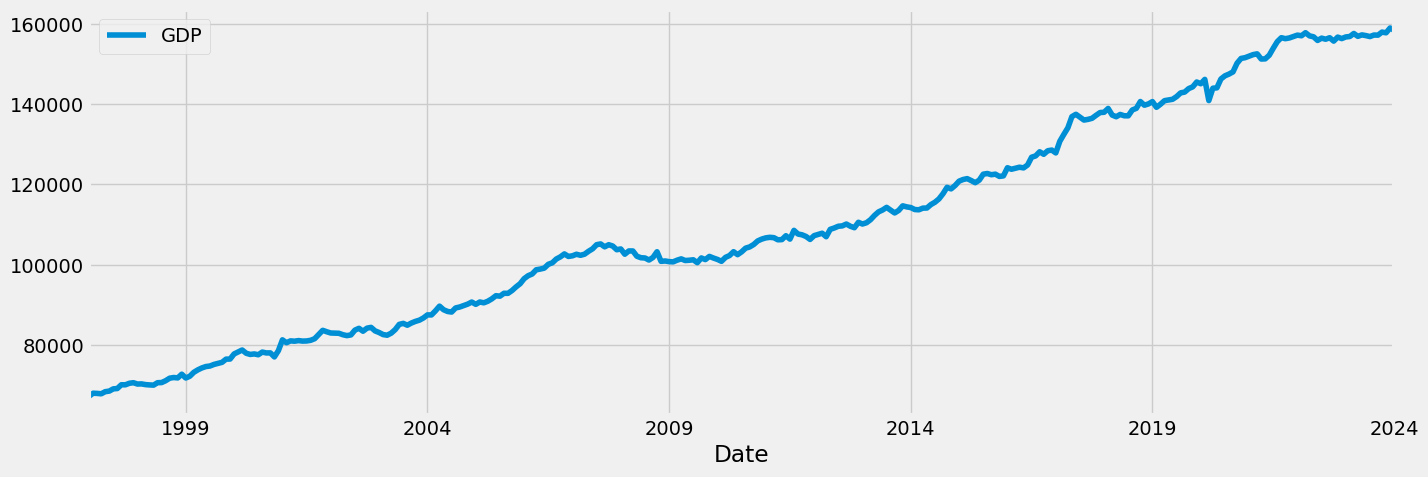

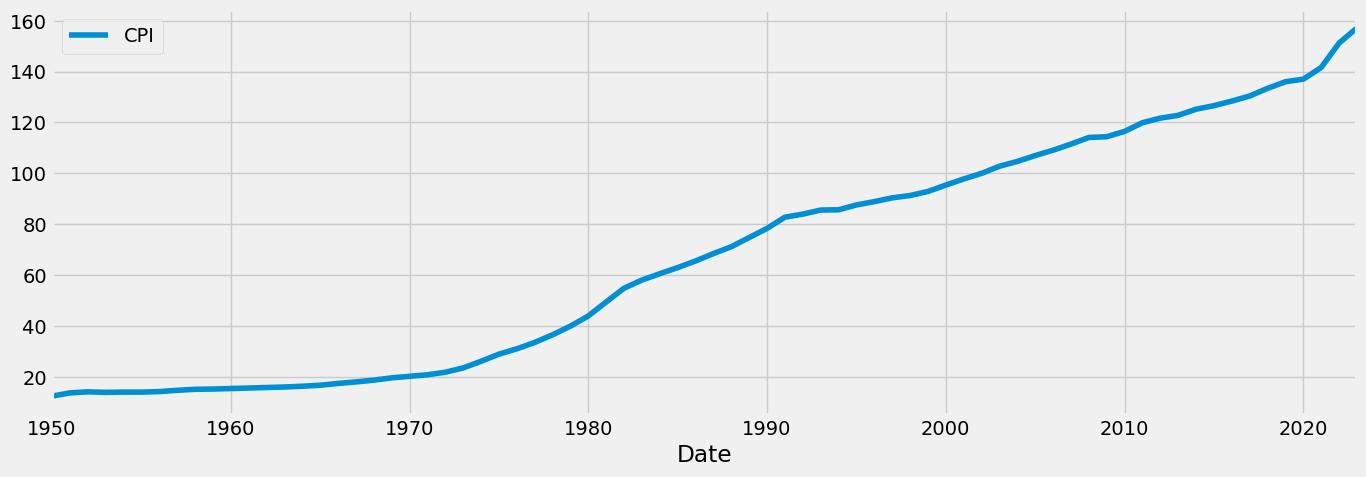

In [9]:
stocks_data1.plot(figsize = (15,5))
RD_spending_data1.plot(figsize = (15,5))
productivity_data1.plot(figsize = (15,5))
gdp1.plot(figsize = (15,5))
cpi1.plot(figsize = (15,5))
plt.show()

### Data Modeling

In [10]:
# Now we are going to select the ARIMA parameters and apply the ARIMA model
import itertools
p = d =q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [11]:
# Now using the Grid Search CV to findout the optimal parameters
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(stocks_data1,
                                      order=param,
                                      seasonal_order=param_seasonal,
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
      results = mod.fit()
      print("ARIMA {}x{} 12 - AIC:{}".format(param,param_seasonal,results.aic))
    except:
      continue
    

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.19862D+00    |proj g|=  4.83702D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   4.837D-07   9.199D+00
  F =   9.1986194378599127     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 0)x(0, 0, 0, 12) 12 - AIC:14885.366250457339
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 varia

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  7.47531D+00    |proj g|=  3.16929D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     22      1     0     0   3.208D-06   7.475D+00
  F =   7.4745967679301213     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 0)x(0, 1, 1, 12) 12 - AIC:12097.897570510937
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.62772D+00    |proj g|=  8.88977D-05

           * * *

Tit   = total number of iterations
Tnf   = total number

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(da


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     12      1     0     0   1.957D-04   7.578D+00
  F =   7.5784733217952374     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 0)x(1, 0, 1, 12) 12 - AIC:12267.969834664695
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49839D+00    |proj g|=  5.06208D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments expl

 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.46942D+00    |proj g|=  4.63437D-02

At iterate   10    f=  7.46792D+00    |proj g|=  1.28606D-04

At iterate   15    f=  7.46790D+00    |proj g|=  5.91176D-03

At iterate   20    f=  7.46692D+00    |proj g|=  2.92081D-02

At iterate   25    f=  7.46652D+00    |proj g|=  4.26832D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   4.268D-06   7.467D+00
  F =   7.4665211540510690     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 0)x(1, 1, 1, 12) 12 - AIC:12086.83122725463
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  8.61474D+00    |proj g|=  4.17076D-02

At iterate   10    f=  8.61267D+00    |proj g|=  3.73004D-04

At iterate   15    f=  8.61266D+00    |proj g|=  3.64226D-03

At iterate   20    f=  8.61155D+00    |proj g|=  4.41823D-02

At iterate   25    f=  8.57663D+00    |proj g|=  2.72672D-01

At iterate   30    f=  7.96647D+00    |proj g|=  1.32322D+00

At iterate   35    f=  7.94901D+00    |proj g|=  5.93698D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     37     54      1     0     0   1.401D-03   7.949D+00
  F =   7.9490010623241636     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


At iterate    5    f=  7.12508D+00    |proj g|=  1.09710D-03

At iterate   10    f=  7.12496D+00    |proj g|=  1.72874D-02

At iterate   15    f=  7.11253D+00    |proj g|=  1.75042D-01

At iterate   20    f=  6.99036D+00    |proj g|=  8.82357D-02

At iterate   25    f=  6.98872D+00    |proj g|=  1.81028D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   1.810D-05   6.989D+00
  F =   6.9887237876747585     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 1)x(0, 1, 1, 12) 12 - AIC:11313.75508845776
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.68987D+00    |proj g|=  8.46985D-01

At iterate    5    f=  8.56861D+00    |proj g|=  9.75814D-03

At iterate   10    f=  8.56804D+00    |proj g|=  5.87353D-04

At iterate   15    f=  8.56786D+00    |proj g|=  1.19897D-02

At iterate   20    f=  8.55389D+00    |proj g|=  3.36385D-02

At iterate   25    f=  8.52549D+00    |proj g|=  1.03594D-01

At iterate   30    f=  8.28738D+00    |proj g|=  9.07733D-01

At iterate   35    f=  7.67005D+00    |proj g|=  3.07327D+01

At iterate   40    f=  7.25205D+00    |proj g|=  2.18575D+00

At iterate   45    f=  7.19088D+00    |proj g|=  8.69406D-01

At iterate   50    f=  7.08381D+00    |proj g|=  7.27069D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  7.12063D+00    |proj g|=  2.79774D-01

At iterate   15    f=  7.02723D+00    |proj g|=  5.44165D-03

At iterate   20    f=  7.02714D+00    |proj g|=  3.12461D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     24      1     0     0   3.125D-06   7.027D+00
  F =   7.0271446713434225     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 1)x(1, 1, 0, 12) 12 - AIC:11375.920078233657
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  7.12264D+00    |proj g|=  1.10895D-03

At iterate   15    f=  7.12238D+00    |proj g|=  1.26730D-02

At iterate   20    f=  7.05672D+00    |proj g|=  3.87391D-01

At iterate   25    f=  6.98204D+00    |proj g|=  1.48977D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     32      1     0     0   8.769D-07   6.982D+00
  F =   6.9818868655279891     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 1)x(1, 1, 1, 12) 12 - AIC:11304.692948424286
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmode

ARIMA (0, 1, 0)x(0, 1, 0, 12) 12 - AIC:10821.397157642314
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.32856D+00    |proj g|=  2.33868D-01

At iterate    5    f=  6.28781D+00    |proj g|=  4.34315D-03

At iterate   10    f=  6.28778D+00    |proj g|=  1.40898D-02

At iterate   15    f=  6.28435D+00    |proj g|=  1.91701D-01

At iterate   20    f=  6.26529D+00    |proj g|=  3.15362D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23     27      1     0     0   6.54

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmode

ARIMA (0, 1, 0)x(1, 0, 1, 12) 12 - AIC:10254.358719722097
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46632D+00    |proj g|=  6.35403D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.354D-06   6.466D+00
  F =   6.4663158002533168     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 0)x(1, 1, 0, 12) 12 - AIC:10466.498964809867
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.28731D+00    |proj g|=  1.83442D-02

At iterate   10    f=  6.28704D+00    |proj g|=  3.69492D-03

At iterate   15    f=  6.28394D+00    |proj g|=  5.79629D-02

At iterate   20    f=  6.26465D+00    |proj g|=  1.92084D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     30      1     0     0   6.002D-06   6.265D+00
  F =   6.2645717707018429     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 0)x(1, 1, 1, 12) 12 - AIC:10142.077124995581
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmode


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   8.554D-06   6.664D+00
  F =   6.6635345728388007     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 1)x(0, 1, 0, 12) 12 - AIC:10785.59893885318
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.36554D+00    |proj g|=  1.48581D-01


 This problem is unconstrained.



At iterate    5    f=  6.34196D+00    |proj g|=  9.41241D-03

At iterate   10    f=  6.34181D+00    |proj g|=  5.90133D-03

At iterate   15    f=  6.33717D+00    |proj g|=  8.93509D-02

At iterate   20    f=  6.28080D+00    |proj g|=  1.76865D-01

At iterate   25    f=  6.25098D+00    |proj g|=  1.16084D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     33      1     0     0   4.270D-06   6.251D+00
  F =   6.2509767476465132     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 1)x(0, 1, 1, 12) 12 - AIC:10120.080377692058
RUNNING THE L-BFGS-B CODE

           * * *

Machine pr

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.32064D+00    |proj g|=  8.99170D-03

At iterate   10    f=  6.32057D+00    |proj g|=  1.45594D-04

At iterate   15    f=  6.32055D+00    |proj g|=  2.68915D-03

At iterate   20    f=  6.32054D+00    |proj g|=  5.81890D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     27      1     0     0   5.916D-06   6.321D+00
  F =   6.3205352828752908     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 1)x(1, 0, 1, 12) 12 - AIC:10234.62608769222
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  6.46943D+00    |proj g|=  6.68755D-03

At iterate   10    f=  6.46444D+00    |proj g|=  8.31837D-02

At iterate   15    f=  6.45440D+00    |proj g|=  2.44383D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     19      1     0     0   6.267D-06   6.454D+00
  F =   6.4544026635721981     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 1)x(1, 1, 0, 12) 12 - AIC:10449.223509659816
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate 

 This problem is unconstrained.



At iterate    5    f=  6.34196D+00    |proj g|=  2.13470D-02

At iterate   10    f=  6.34165D+00    |proj g|=  2.18920D-03

At iterate   15    f=  6.33761D+00    |proj g|=  5.05248D-02

At iterate   20    f=  6.25910D+00    |proj g|=  7.07743D-02

At iterate   25    f=  6.25072D+00    |proj g|=  2.14852D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     33      1     0     0   3.226D-06   6.251D+00
  F =   6.2507235445024625     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 1)x(1, 1, 1, 12) 12 - AIC:10121.670695004985
RUNNING THE L-BFGS-B CODE

           * * *

Machine pr

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(da

ARIMA (1, 0, 0)x(0, 1, 0, 12) 12 - AIC:10805.081424202199
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.55315D+00    |proj g|=  4.18150D-01


/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.35958D+00    |proj g|=  1.10663D-01

At iterate   10    f=  6.35744D+00    |proj g|=  1.91082D-02

At iterate   15    f=  6.33360D+00    |proj g|=  4.32012D-01

At iterate   20    f=  6.27796D+00    |proj g|=  3.46443D-01

At iterate   25    f=  6.27150D+00    |proj g|=  5.58261D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     79      2     0     0   5.583D-05   6.272D+00
  F =   6.2715011607892013     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA (1, 0, 0)x(0, 1, 1, 12) 12 - AIC:10153.288878156927
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.86618D+00    |proj g|=  1.02513D+00

At iterate    5    f=  6.54902D+00    |proj g|=  2.71874D+00

At iterate   10    f=  6.34142D+00    |proj g|=  8.67233D-04

           

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.37145D+00    |proj g|=  1.56526D+00

At iterate   10    f=  6.34342D+00    |proj g|=  6.33518D-03

At iterate   15    f=  6.34243D+00    |proj g|=  2.04635D-01

At iterate   20    f=  6.34135D+00    |proj g|=  1.19452D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     32      1     0     0   8.701D-05   6.341D+00
  F =   6.3413543478900634     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 0)x(1, 0, 1, 12) 12 - AIC:10268.311334886122
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  6.46679D+00    |proj g|=  2.76841D-03

At iterate   10    f=  6.46474D+00    |proj g|=  7.04342D-02

At iterate   15    f=  6.45258D+00    |proj g|=  4.18316D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     22      1     0     0   6.946D-07   6.453D+00
  F =   6.4525750870128551     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 0, 0)x(1, 1, 0, 12) 12 - AIC:10446.2664907868
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate   10    f=  6.35721D+00    |proj g|=  6.64917D-03

At iterate   15    f=  6.35712D+00    |proj g|=  2.48002D-02

At iterate   20    f=  6.35133D+00    |proj g|=  3.11847D-01

At iterate   25    f=  6.27623D+00    |proj g|=  1.72063D-01

At iterate   30    f=  6.27100D+00    |proj g|=  1.82229D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     40      1     0     0   5.603D-05   6.271D+00
  F =   6.2709929568460119     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 0)x(1, 1, 1, 12) 12 - AIC:10154.466604176847
RUNNING THE L-BFGS-B CODE

           * * *

Machine pr

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmode


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      8      1     0     0   1.135D-03   6.416D+00
  F =   6.4162541474934365     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1)x(0, 0, 0, 12) 12 - AIC:10387.49921064438
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.93023D+00    |proj g|=  1.52817D+01

At iterate    5    f=  6.33001D+00    |proj g|=  1.66868D-01
ARIMA (1, 0, 1)x(0, 0, 1, 12) 12 - AIC:10246.592697062388

At iterate   10 

 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      8      1     0     0   2.000D-05   6.646D+00
  F =   6.6457624133756186     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1)x(0, 1, 0, 12) 12 - AIC:10758.84358484175
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.52474D+00    |proj g|=  4.04367D-01

At iterate    5    f=  6.33753D+00    |proj g|=  3.81655D-02

At iterate   10    f=  6.33663D+00    |proj g|=  7.01384D-03

At iterate  

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.77038D+00    |proj g|=  9.36482D-01

At iterate    5    f=  6.33791D+00    |proj g|=  2.65644D-01

At iterate   10    f=  6.33048D+00    |proj g|=  3.54805D-02

At iterate   15    f=  6.32964D+00    |proj g|=  6.65827D-02

At iterate   20    f=  6.32793D+00    |proj g|=  3.89587D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     26      1     0     0   1.691D-04   6.328D+00
  F =   6.3279259103477585     

CONVERG

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


ARIMA (1, 0, 1)x(1, 1, 0, 12) 12 - AIC:10422.002632189377
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.52658D+00    |proj g|=  3.85337D-01

At iterate    5    f=  6.37905D+00    |proj g|=  4.76041D-01


/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.33768D+00    |proj g|=  3.47936D-02

At iterate   15    f=  6.33647D+00    |proj g|=  2.41557D-03

At iterate   20    f=  6.33636D+00    |proj g|=  4.68803D-02

At iterate   25    f=  6.32290D+00    |proj g|=  5.11234D-01

At iterate   30    f=  6.25807D+00    |proj g|=  5.99212D-02

At iterate   35    f=  6.25675D+00    |proj g|=  3.10173D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     45      1     0     0   2.656D-06   6.257D+00
  F =   6.2566493128527236     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 0, 1)x(1, 1, 1, 12) 12 - AIC:10133.258588

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmode

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.37210D+00    |proj g|=  1.48660D-01


 This problem is unconstrained.



At iterate    5    f=  6.34849D+00    |proj g|=  8.50432D-03

At iterate   10    f=  6.34816D+00    |proj g|=  2.53729D-02

At iterate   15    f=  6.30801D+00    |proj g|=  3.10892D-01

At iterate   20    f=  6.25846D+00    |proj g|=  3.57968D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     31      1     0     0   2.393D-05   6.258D+00
  F =   6.2583482761580154     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 0)x(0, 1, 1, 12) 12 - AIC:10132.007510823669
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.32794D+00    |proj g|=  7.46773D-03

At iterate   10    f=  6.32789D+00    |proj g|=  9.29069D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     15      1     0     0   9.291D-05   6.328D+00
  F =   6.3278912062273953     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 0)x(1, 0, 1, 12) 12 - AIC:10246.527971675925
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46103D+00    |proj g|=  1.84165D-02

At iterate 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.44958D+00    |proj g|=  8.27656D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   5.026D-06   6.446D+00
  F =   6.4463491230577015     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 1, 0)x(1, 1, 0, 12) 12 - AIC:10436.192881107361
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.37744D+00    |proj g|=  1.44636D-01

At iterate    5    f=  6.34858D+00    |proj g|=  2.36547D-02

At iterate 

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmode


At iterate    5    f=  6.66243D+00    |proj g|=  3.85481D-04

At iterate   10    f=  6.66243D+00    |proj g|=  2.66631D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     17      1     0     0   2.666D-07   6.662D+00
  F =   6.6624323814944661     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 1, 1)x(0, 1, 0, 12) 12 - AIC:10785.815593258047
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.36506D+00    |proj g|=  1.48122D-01


/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.34156D+00    |proj g|=  6.05388D-03

At iterate   10    f=  6.34134D+00    |proj g|=  1.06507D-02

At iterate   15    f=  6.33860D+00    |proj g|=  1.48421D-02

At iterate   20    f=  6.33788D+00    |proj g|=  3.28246D-02

At iterate   25    f=  6.26985D+00    |proj g|=  3.51162D-01

At iterate   30    f=  6.25704D+00    |proj g|=  4.17070D-03

At iterate   35    f=  6.25702D+00    |proj g|=  4.22538D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     66      1     0     0   7.441D-06   6.257D+00
  F =   6.2570155884370182     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.32088D+00    |proj g|=  1.44108D-02

At iterate    5    f=  6.32074D+00    |proj g|=  6.24012D-03

At iterate   10    f=  6.32051D+00    |proj g|=  2.11446D-04

At iterate   15    f=  6.32051D+00    |proj g|=  9.42711D-04

At iterate   20    f=  6.32050D+00    |proj g|=  2.13679D-03

At iterate   25    f=  6.32048D+00    |proj g|=  1.70647D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     34      1     0     0   

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  6.44635D+00    |proj g|=  4.31136D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     27      1     0     0   1.241D-05   6.446D+00
  F =   6.4463489743943487     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 1)x(1, 1, 0, 12) 12 - AIC:10438.192640570056
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.37037D+00    |proj g|=  1.44148D-01


/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.34164D+00    |proj g|=  2.43805D-02

At iterate   10    f=  6.34132D+00    |proj g|=  2.97075D-03

At iterate   15    f=  6.33953D+00    |proj g|=  2.99847D-02

At iterate   20    f=  6.33691D+00    |proj g|=  2.55847D-02

At iterate   25    f=  6.30356D+00    |proj g|=  1.93307D-01

At iterate   30    f=  6.25243D+00    |proj g|=  2.75656D-02

At iterate   35    f=  6.25068D+00    |proj g|=  3.33066D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     50      1     0     0   9.593D-06   6.251D+00
  F =   6.2506818528036812     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.48306D+00    |proj g|=  5.28461D-02

At iterate    5    f=  6.45779D+00    |proj g|=  1.75769D-02

At iterate   10    f=  6.45240D+00    |proj g|=  5.21814D-03

At iterate   15    f=  6.35909D+00    |proj g|=  1.46918D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     25      1     0     0   5.104D-07   6.359D+00
  F =   6.3590856152108035     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
        

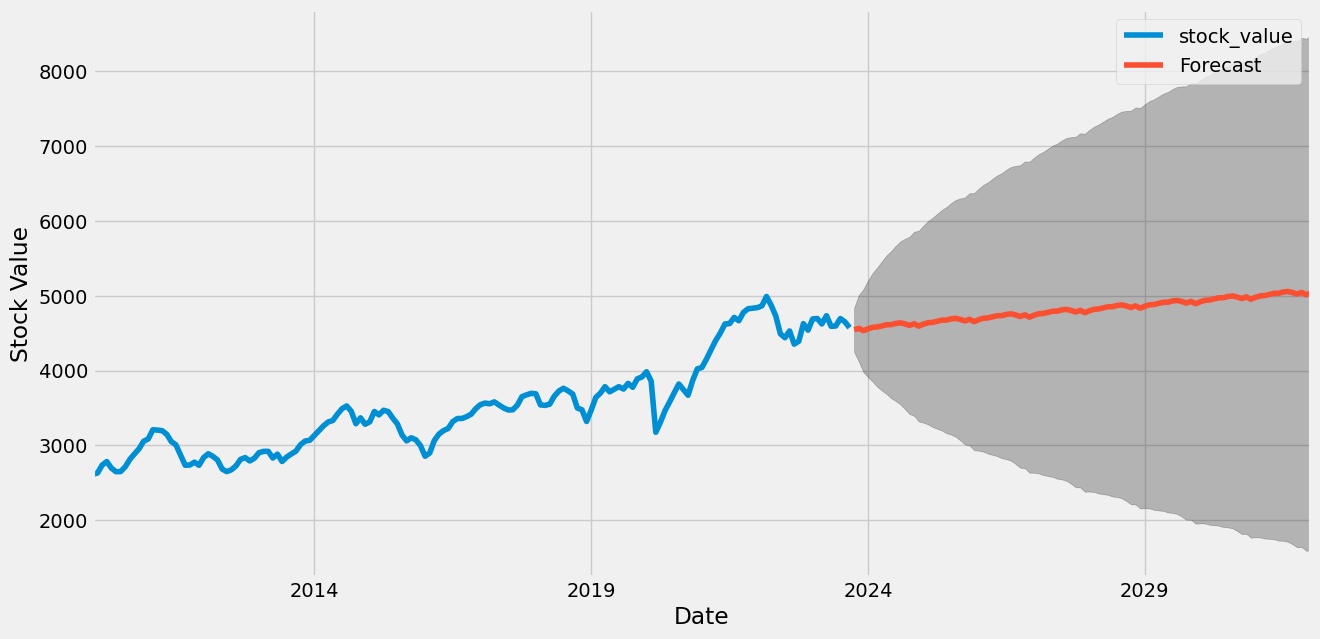

In [12]:
#Stock Prices Prediction
mod = sm.tsa.statespace.SARIMAX(stocks_data1,
                                order = (0, 1, 1),
                                seasonal_order = (1, 1, 1, 12),
                                enforce_invertibility = True)
results = mod.fit()
print(results.summary().tables[1])


pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = stocks_data1['2010':].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
stock_prices_prediction = round(pred_uc.predicted_mean,4)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Value')
plt.legend()
plt.show()

18:16:28 - cmdstanpy - INFO - Chain [1] start processing
18:16:28 - cmdstanpy - INFO - Chain [1] done processing


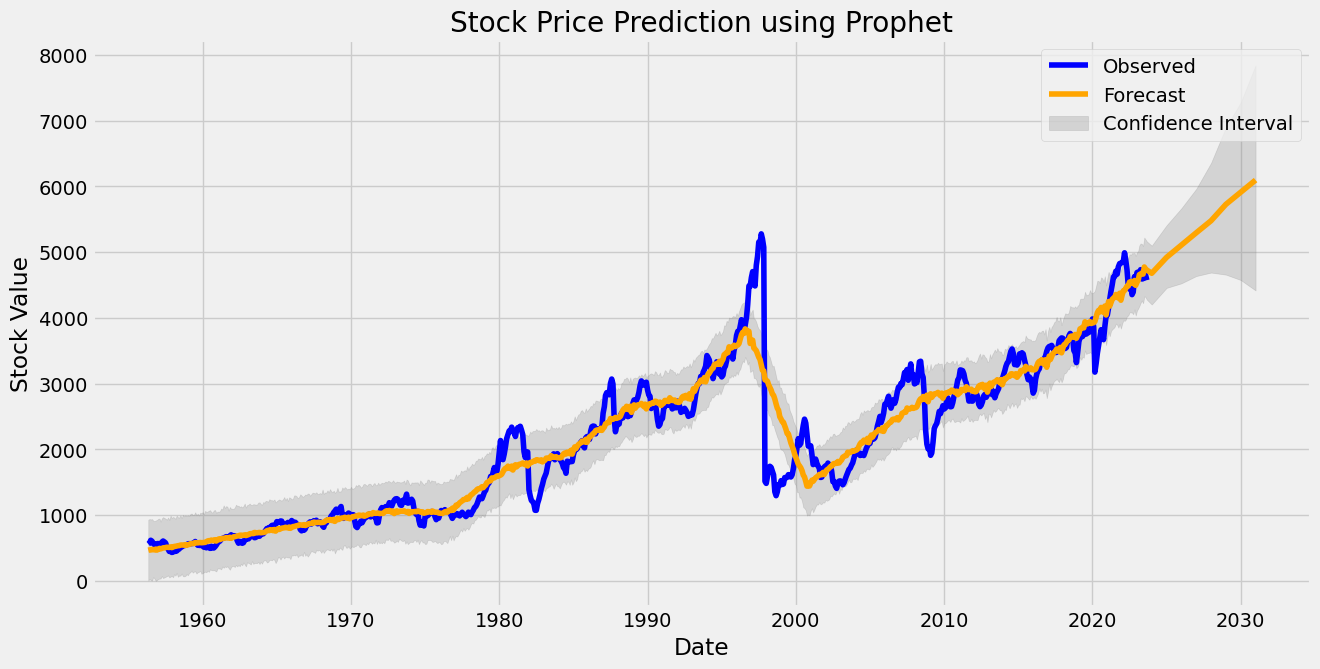

  0%|          | 0/796 [00:00<?, ?it/s]

18:16:29 - cmdstanpy - INFO - Chain [1] start processing
18:16:33 - cmdstanpy - INFO - Chain [1] done processing
18:16:33 - cmdstanpy - INFO - Chain [1] start processing
18:16:39 - cmdstanpy - INFO - Chain [1] done processing
18:16:39 - cmdstanpy - INFO - Chain [1] start processing
18:16:44 - cmdstanpy - INFO - Chain [1] done processing
18:16:44 - cmdstanpy - INFO - Chain [1] start processing
18:16:50 - cmdstanpy - INFO - Chain [1] done processing
18:16:50 - cmdstanpy - INFO - Chain [1] start processing
18:16:56 - cmdstanpy - INFO - Chain [1] done processing
18:16:56 - cmdstanpy - INFO - Chain [1] start processing
18:17:02 - cmdstanpy - INFO - Chain [1] done processing
18:17:02 - cmdstanpy - INFO - Chain [1] start processing
18:17:08 - cmdstanpy - INFO - Chain [1] done processing
18:17:09 - cmdstanpy - INFO - Chain [1] start processing
18:17:15 - cmdstanpy - INFO - Chain [1] done processing
18:17:15 - cmdstanpy - INFO - Chain [1] start processing
18:17:21 - cmdstanpy - INFO - Chain [1]

18:18:22 - cmdstanpy - INFO - Chain [1] done processing
18:18:22 - cmdstanpy - INFO - Chain [1] start processing
18:18:22 - cmdstanpy - INFO - Chain [1] done processing
18:18:22 - cmdstanpy - INFO - Chain [1] start processing
18:18:22 - cmdstanpy - INFO - Chain [1] done processing
18:18:22 - cmdstanpy - INFO - Chain [1] start processing
18:18:22 - cmdstanpy - INFO - Chain [1] done processing
18:18:22 - cmdstanpy - INFO - Chain [1] start processing
18:18:22 - cmdstanpy - INFO - Chain [1] done processing
18:18:22 - cmdstanpy - INFO - Chain [1] start processing
18:18:22 - cmdstanpy - INFO - Chain [1] done processing
18:18:22 - cmdstanpy - INFO - Chain [1] start processing
18:18:22 - cmdstanpy - INFO - Chain [1] done processing
18:18:22 - cmdstanpy - INFO - Chain [1] start processing
18:18:22 - cmdstanpy - INFO - Chain [1] done processing
18:18:23 - cmdstanpy - INFO - Chain [1] start processing
18:18:23 - cmdstanpy - INFO - Chain [1] done processing
18:18:23 - cmdstanpy - INFO - Chain [1] 

18:18:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:18:25 - cmdstanpy - INFO - Chain [1] start processing
18:18:26 - cmdstanpy - INFO - Chain [1] done processing
18:18:26 - cmdstanpy - INFO - Chain [1] start processing
18:18:26 - cmdstanpy - INFO - Chain [1] done processing
18:18:26 - cmdstanpy - INFO - Chain [1] start processing
18:18:26 - cmdstanpy - INFO - Chain [1] done processing
18:18:26 - cmdstanpy - INFO - Chain [1] start processing
18:18:26 - cmdstanpy - INFO - Chain [1] done processing
18:18:26 - cmdstanpy - INFO - Chain [1] start processing
18:18:26 - cmdstanpy - INFO - Chain [1] done processing
18:18:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:18:26 - cmdstanpy - INFO - Chain [1] start processing
18:18:26 - cmdstanpy - INFO - Chain [1] done processing
18:18:26 -

18:18:28 - cmdstanpy - INFO - Chain [1] start processing
18:18:28 - cmdstanpy - INFO - Chain [1] done processing
18:18:28 - cmdstanpy - INFO - Chain [1] start processing
18:18:28 - cmdstanpy - INFO - Chain [1] done processing
18:18:29 - cmdstanpy - INFO - Chain [1] start processing
18:18:29 - cmdstanpy - INFO - Chain [1] done processing
18:18:29 - cmdstanpy - INFO - Chain [1] start processing
18:18:29 - cmdstanpy - INFO - Chain [1] done processing
18:18:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:18:29 - cmdstanpy - INFO - Chain [1] start processing
18:18:29 - cmdstanpy - INFO - Chain [1] done processing
18:18:29 - cmdstanpy - INFO - Chain [1] start processing
18:18:29 - cmdstanpy - INFO - Chain [1] done processing
18:18:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:18:29 -

18:18:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:18:32 - cmdstanpy - INFO - Chain [1] start processing
18:18:32 - cmdstanpy - INFO - Chain [1] done processing
18:18:32 - cmdstanpy - INFO - Chain [1] start processing
18:18:32 - cmdstanpy - INFO - Chain [1] done processing
18:18:32 - cmdstanpy - INFO - Chain [1] start processing
18:18:32 - cmdstanpy - INFO - Chain [1] done processing
18:18:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:18:32 - cmdstanpy - INFO - Chain [1] start processing
18:18:32 - cmdstanpy - INFO - Chain [1] done processing
18:18:32 - cmdstanpy - INFO - Chain [1] start processing
18:18:32 - cmdstanpy - INFO - Chain [1] done processing
18:18:32 - cmdstanpy - INFO - Chain [1] start processing
18:18:32 - cmdstanpy - INFO - Chain [1] done processing
18:18:32 -

18:18:36 - cmdstanpy - INFO - Chain [1] done processing
18:18:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:18:36 - cmdstanpy - INFO - Chain [1] start processing
18:18:37 - cmdstanpy - INFO - Chain [1] done processing
18:18:37 - cmdstanpy - INFO - Chain [1] start processing
18:18:37 - cmdstanpy - INFO - Chain [1] done processing
18:18:37 - cmdstanpy - INFO - Chain [1] start processing
18:18:37 - cmdstanpy - INFO - Chain [1] done processing
18:18:37 - cmdstanpy - INFO - Chain [1] start processing
18:18:37 - cmdstanpy - INFO - Chain [1] done processing
18:18:37 - cmdstanpy - INFO - Chain [1] start processing
18:18:37 - cmdstanpy - INFO - Chain [1] done processing
18:18:37 - cmdstanpy - INFO - Chain [1] start processing
18:18:37 - cmdstanpy - INFO - Chain [1] done processing
18:18:37 - cmdstanpy - INFO - Chain [1] start processing
18:18:37 - cmdstanpy - INFO - Chain [1] done processi

18:18:41 - cmdstanpy - INFO - Chain [1] done processing
18:18:41 - cmdstanpy - INFO - Chain [1] start processing
18:18:41 - cmdstanpy - INFO - Chain [1] done processing
18:18:41 - cmdstanpy - INFO - Chain [1] start processing
18:18:41 - cmdstanpy - INFO - Chain [1] done processing
18:18:41 - cmdstanpy - INFO - Chain [1] start processing
18:18:41 - cmdstanpy - INFO - Chain [1] done processing
18:18:41 - cmdstanpy - INFO - Chain [1] start processing
18:18:41 - cmdstanpy - INFO - Chain [1] done processing
18:18:41 - cmdstanpy - INFO - Chain [1] start processing
18:18:41 - cmdstanpy - INFO - Chain [1] done processing
18:18:41 - cmdstanpy - INFO - Chain [1] start processing
18:18:41 - cmdstanpy - INFO - Chain [1] done processing
18:18:41 - cmdstanpy - INFO - Chain [1] start processing
18:18:41 - cmdstanpy - INFO - Chain [1] done processing
18:18:41 - cmdstanpy - INFO - Chain [1] start processing
18:18:41 - cmdstanpy - INFO - Chain [1] done processing
18:18:42 - cmdstanpy - INFO - Chain [1] 

18:18:46 - cmdstanpy - INFO - Chain [1] start processing
18:18:46 - cmdstanpy - INFO - Chain [1] done processing
18:18:46 - cmdstanpy - INFO - Chain [1] start processing
18:18:46 - cmdstanpy - INFO - Chain [1] done processing
18:18:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:18:46 - cmdstanpy - INFO - Chain [1] start processing
18:18:46 - cmdstanpy - INFO - Chain [1] done processing
18:18:46 - cmdstanpy - INFO - Chain [1] start processing
18:18:46 - cmdstanpy - INFO - Chain [1] done processing
18:18:46 - cmdstanpy - INFO - Chain [1] start processing
18:18:46 - cmdstanpy - INFO - Chain [1] done processing
18:18:46 - cmdstanpy - INFO - Chain [1] start processing
18:18:47 - cmdstanpy - INFO - Chain [1] done processing
18:18:47 - cmdstanpy - INFO - Chain [1] start processing
18:18:47 - cmdstanpy - INFO - Chain [1] done processing
18:18:47 - cmdstanpy - INFO - Chain [1] start process

18:18:53 - cmdstanpy - INFO - Chain [1] done processing
18:18:53 - cmdstanpy - INFO - Chain [1] start processing
18:18:53 - cmdstanpy - INFO - Chain [1] done processing
18:18:53 - cmdstanpy - INFO - Chain [1] start processing
18:18:53 - cmdstanpy - INFO - Chain [1] done processing
18:18:53 - cmdstanpy - INFO - Chain [1] start processing
18:18:53 - cmdstanpy - INFO - Chain [1] done processing
18:18:53 - cmdstanpy - INFO - Chain [1] start processing
18:18:53 - cmdstanpy - INFO - Chain [1] done processing
18:18:53 - cmdstanpy - INFO - Chain [1] start processing
18:18:53 - cmdstanpy - INFO - Chain [1] done processing
18:18:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:18:53 - cmdstanpy - INFO - Chain [1] start processing
18:18:54 - cmdstanpy - INFO - Chain [1] done processing
18:18:54 - cmdstanpy - INFO - Chain [1] start processing
18:18:54 - cmdstanpy - INFO - Chain [1] done processi

18:18:59 - cmdstanpy - INFO - Chain [1] done processing
18:18:59 - cmdstanpy - INFO - Chain [1] start processing
18:18:59 - cmdstanpy - INFO - Chain [1] done processing
18:18:59 - cmdstanpy - INFO - Chain [1] start processing
18:18:59 - cmdstanpy - INFO - Chain [1] done processing
18:18:59 - cmdstanpy - INFO - Chain [1] start processing
18:18:59 - cmdstanpy - INFO - Chain [1] done processing
18:18:59 - cmdstanpy - INFO - Chain [1] start processing
18:18:59 - cmdstanpy - INFO - Chain [1] done processing
18:18:59 - cmdstanpy - INFO - Chain [1] start processing
18:18:59 - cmdstanpy - INFO - Chain [1] done processing
18:18:59 - cmdstanpy - INFO - Chain [1] start processing
18:18:59 - cmdstanpy - INFO - Chain [1] done processing
18:18:59 - cmdstanpy - INFO - Chain [1] start processing
18:18:59 - cmdstanpy - INFO - Chain [1] done processing
18:18:59 - cmdstanpy - INFO - Chain [1] start processing
18:18:59 - cmdstanpy - INFO - Chain [1] done processing
18:19:00 - cmdstanpy - INFO - Chain [1] 

18:19:06 - cmdstanpy - INFO - Chain [1] done processing
18:19:06 - cmdstanpy - INFO - Chain [1] start processing
18:19:06 - cmdstanpy - INFO - Chain [1] done processing
18:19:06 - cmdstanpy - INFO - Chain [1] start processing
18:19:06 - cmdstanpy - INFO - Chain [1] done processing
18:19:06 - cmdstanpy - INFO - Chain [1] start processing
18:19:06 - cmdstanpy - INFO - Chain [1] done processing
18:19:06 - cmdstanpy - INFO - Chain [1] start processing
18:19:06 - cmdstanpy - INFO - Chain [1] done processing
18:19:06 - cmdstanpy - INFO - Chain [1] start processing
18:19:06 - cmdstanpy - INFO - Chain [1] done processing
18:19:06 - cmdstanpy - INFO - Chain [1] start processing
18:19:06 - cmdstanpy - INFO - Chain [1] done processing
18:19:06 - cmdstanpy - INFO - Chain [1] start processing
18:19:06 - cmdstanpy - INFO - Chain [1] done processing
18:19:06 - cmdstanpy - INFO - Chain [1] start processing
18:19:07 - cmdstanpy - INFO - Chain [1] done processing
18:19:07 - cmdstanpy - INFO - Chain [1] 

18:19:13 - cmdstanpy - INFO - Chain [1] done processing
18:19:13 - cmdstanpy - INFO - Chain [1] start processing
18:19:13 - cmdstanpy - INFO - Chain [1] done processing
18:19:13 - cmdstanpy - INFO - Chain [1] start processing
18:19:13 - cmdstanpy - INFO - Chain [1] done processing
18:19:13 - cmdstanpy - INFO - Chain [1] start processing
18:19:13 - cmdstanpy - INFO - Chain [1] done processing
18:19:13 - cmdstanpy - INFO - Chain [1] start processing
18:19:13 - cmdstanpy - INFO - Chain [1] done processing
18:19:13 - cmdstanpy - INFO - Chain [1] start processing
18:19:13 - cmdstanpy - INFO - Chain [1] done processing
18:19:13 - cmdstanpy - INFO - Chain [1] start processing
18:19:13 - cmdstanpy - INFO - Chain [1] done processing
18:19:13 - cmdstanpy - INFO - Chain [1] start processing
18:19:14 - cmdstanpy - INFO - Chain [1] done processing
18:19:14 - cmdstanpy - INFO - Chain [1] start processing
18:19:14 - cmdstanpy - INFO - Chain [1] done processing
18:19:14 - cmdstanpy - INFO - Chain [1] 

18:19:21 - cmdstanpy - INFO - Chain [1] done processing
18:19:21 - cmdstanpy - INFO - Chain [1] start processing
18:19:21 - cmdstanpy - INFO - Chain [1] done processing
18:19:21 - cmdstanpy - INFO - Chain [1] start processing
18:19:21 - cmdstanpy - INFO - Chain [1] done processing
18:19:21 - cmdstanpy - INFO - Chain [1] start processing
18:19:21 - cmdstanpy - INFO - Chain [1] done processing
18:19:21 - cmdstanpy - INFO - Chain [1] start processing
18:19:21 - cmdstanpy - INFO - Chain [1] done processing
18:19:21 - cmdstanpy - INFO - Chain [1] start processing
18:19:21 - cmdstanpy - INFO - Chain [1] done processing
18:19:21 - cmdstanpy - INFO - Chain [1] start processing
18:19:21 - cmdstanpy - INFO - Chain [1] done processing
18:19:21 - cmdstanpy - INFO - Chain [1] start processing
18:19:22 - cmdstanpy - INFO - Chain [1] done processing
18:19:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newto

18:19:29 - cmdstanpy - INFO - Chain [1] done processing
18:19:29 - cmdstanpy - INFO - Chain [1] start processing
18:19:29 - cmdstanpy - INFO - Chain [1] done processing
18:19:29 - cmdstanpy - INFO - Chain [1] start processing
18:19:29 - cmdstanpy - INFO - Chain [1] done processing
18:19:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:19:29 - cmdstanpy - INFO - Chain [1] start processing
18:19:30 - cmdstanpy - INFO - Chain [1] done processing
18:19:30 - cmdstanpy - INFO - Chain [1] start processing
18:19:30 - cmdstanpy - INFO - Chain [1] done processing
18:19:30 - cmdstanpy - INFO - Chain [1] start processing
18:19:30 - cmdstanpy - INFO - Chain [1] done processing
18:19:30 - cmdstanpy - INFO - Chain [1] start processing
18:19:30 - cmdstanpy - INFO - Chain [1] done processing
18:19:30 - cmdstanpy - INFO - Chain [1] start processing
18:19:30 - cmdstanpy - INFO - Chain [1] done processi

                    horizon        mae      mape       rmse
0 0 days 00:00:00.000000005  258.58789  0.139565  465.42856
            ds       yhat  yhat_lower  yhat_upper
797 2022-10-01  4520.3338   4055.3686   4981.8682
798 2022-11-01  4568.7750   4129.7671   4986.1105
799 2022-12-01  4495.0681   4035.3184   4941.8847
800 2023-01-01  4540.2309   4110.8135   4995.6035
801 2023-02-01  4574.2104   4143.6466   5016.3056
802 2023-03-01  4657.6852   4180.8591   5102.2988
803 2023-04-01  4666.8165   4228.8009   5131.9673
804 2023-05-01  4680.4551   4264.7574   5125.3937
805 2023-06-01  4665.3041   4223.3820   5092.1423
806 2023-07-01  4774.2472   4328.8725   5221.2294
807 2023-08-01  4745.2208   4314.8842   5192.3343
808 2023-09-01  4727.6386   4278.1816   5162.8668
809 2023-12-31  4678.4484   4203.3974   5098.1297
810 2024-12-31  4920.9926   4456.3486   5408.2750
811 2025-12-31  5108.5405   4525.7659   5667.9778
812 2026-12-31  5294.0884   4636.1070   5962.3861
813 2027-12-31  5477.5588   46

In [130]:
from prophet.diagnostics import cross_validation, performance_metrics
# Assuming stocks_data1 is a Pandas Series with a DateTime index
# Convert the Series to a DataFrame
stocks_df = stocks_data1.reset_index()
stocks_df.columns = ['ds', 'y']  # Rename columns to match Prophet's requirements

# Initialize a Prophet model
stock_model = Prophet(
    growth='linear',  # Linear trend is common for stock price predictions
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative',  # Multiplicative seasonality can work better for stock data
    changepoint_prior_scale=0.5,
    seasonality_prior_scale=10.0,
    n_changepoints=15,
    changepoint_range=0.9
)

# Fit the model
stock_model.fit(stocks_df)

# Create a future DataFrame for 100 steps ahead (assuming daily data)
future = stock_model.make_future_dataframe(periods=8, freq='Y')

# Forecast
stock_forecast = stock_model.predict(future)

# Plot the historical stock data
fig = plt.figure(figsize=(14, 7))
plt.plot(stocks_df['ds'], stocks_df['y'], label='Observed', color='blue')

# Plot the forecasted stock values
plt.plot(stock_forecast['ds'], stock_forecast['yhat'], label='Forecast', color='orange')

# Fill the confidence intervals with a different color
plt.fill_between(stock_forecast['ds'], 
                 stock_forecast['yhat_lower'], 
                 stock_forecast['yhat_upper'], 
                 color='gray', alpha=0.25, label='Confidence Interval')

# Set titles and labels
plt.title('Stock Price Prediction using Prophet')
plt.xlabel('Date')
plt.ylabel('Stock Value')
plt.legend()
plt.show()


df_cv = cross_validation(stock_model, horizon='5')
# Calculate performance metrics
df_p = performance_metrics(df_cv)
print(df_p[['horizon', 'mae', 'mape', 'rmse']])

# Print summary of predictions
stock_prices_prediction = stock_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20).round(4)
print(stock_prices_prediction)


In [132]:
stocks_df

,ds,y
0,1956-05-01,560.09
1,1956-06-01,575.39
2,1956-07-01,617.67
3,1956-08-01,603.75
4,1956-09-01,566.99
5,1956-10-01,554.02
6,1956-11-01,524.63
7,1956-12-01,564.97
8,1957-01-01,568.14
9,1957-02-01,545.24


In [133]:
from sklearn.metrics import r2_score

actual = stocks_df['y']  # Your actual values
predicted = stock_forecast['yhat'][:len(actual)]  # Take predictions for the existing data length

r2 = r2_score(actual, predicted)
print(f"R-squared: {r2:.2f}")

R-squared: 0.91


/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.03248D-01    |proj g|=  2.61004D-01

At iterate    5    f= -3.08114D-01    |proj g|=  2.10009D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     19      1     0     0   8.679D-04  -3.081D-01
  F = -0.30811422895061308     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

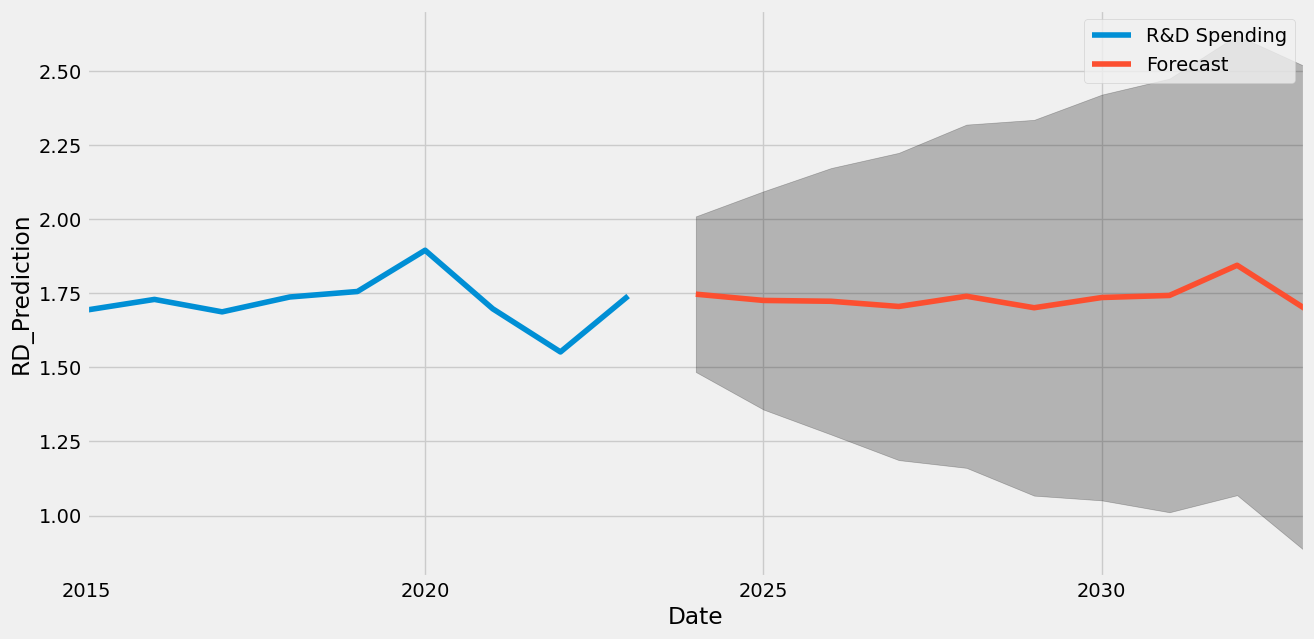

In [25]:
#RD Prediction
RD_model = sm.tsa.statespace.SARIMAX(RD_spending_data1,
                                order = (0, 1, 1),
                                seasonal_order = (1, 1, 1, 12),
                                enforce_invertibility = False)
RD_results = RD_model.fit()
print(RD_results.summary().tables[1])


RD_pred_uc = RD_results.get_forecast(steps=10)
RD_pred_ci = RD_pred_uc.conf_int()
ax = RD_spending_data1['2015':].plot(label='observed', figsize=(14, 7))
RD_pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(RD_pred_ci.index,
                RD_pred_ci.iloc[:, 0],
                RD_pred_ci.iloc[:, 1], color='k', alpha=.25)
RD_prediction = round(RD_pred_uc.predicted_mean,4)
ax.set_xlabel('Date')
ax.set_ylabel('RD_Prediction')
plt.legend()
plt.show()

17:44:20 - cmdstanpy - INFO - Chain [1] start processing
17:44:20 - cmdstanpy - INFO - Chain [1] done processing


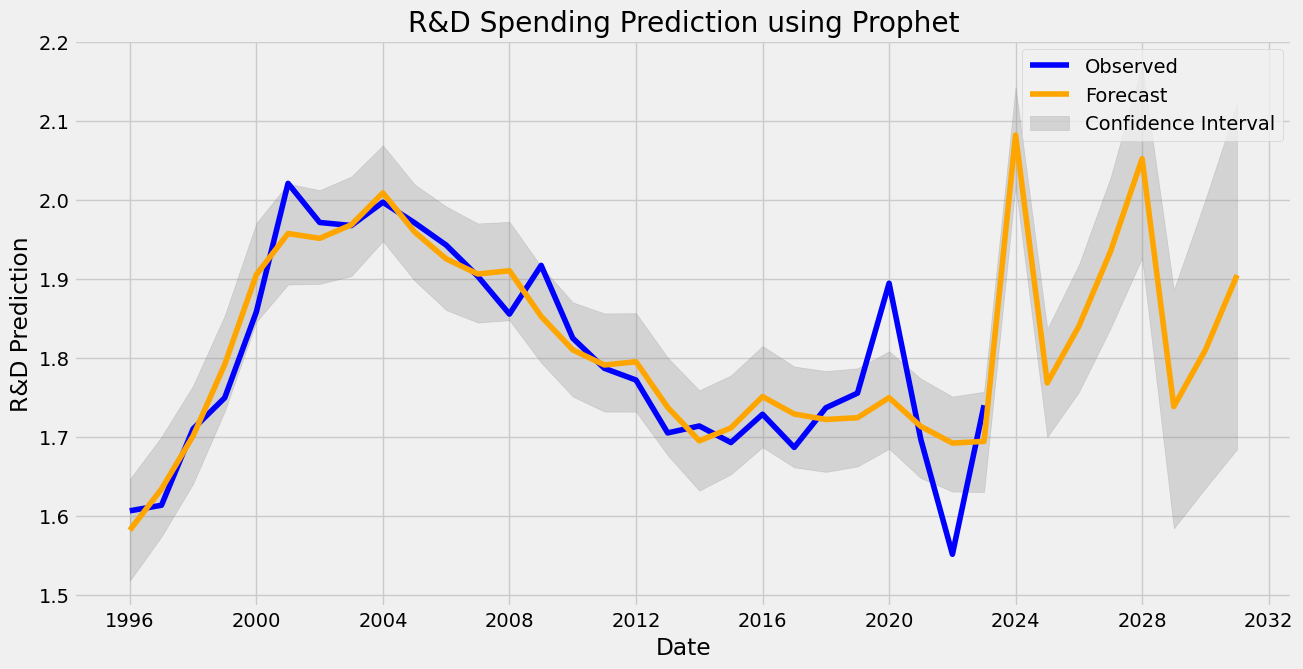

           ds    yhat  yhat_lower  yhat_upper
26 2022-01-01  1.6925      1.6312      1.7514
27 2023-01-01  1.6947      1.6306      1.7575
28 2023-12-31  2.0823      2.0183      2.1435
29 2024-12-31  1.7687      1.7002      1.8369
30 2025-12-31  1.8403      1.7572      1.9182
31 2026-12-31  1.9350      1.8377      2.0284
32 2027-12-31  2.0523      1.9269      2.1705
33 2028-12-31  1.7388      1.5846      1.8865
34 2029-12-31  1.8104      1.6356      2.0007
35 2030-12-31  1.9050      1.6848      2.1223


In [91]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming RD_spending_data1 is a Pandas Series with a DateTime index
# Convert the Series to a DataFrame
rd_df = RD_spending_data1.reset_index()
rd_df.columns = ['ds', 'y']  # Rename columns to fit Prophet's requirements

# Create a Prophet model
RD_model = Prophet(
    growth='linear',  # Adjust to 'logistic' if data suggests a saturation point
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='additive',
    changepoint_prior_scale=0.5,
    seasonality_prior_scale=10.0,
    n_changepoints=10,
    changepoint_range=0.95
)

# Fit the model
RD_model.fit(rd_df)

# Create a future DataFrame for 10 steps ahead (assuming monthly data)
future = RD_model.make_future_dataframe(periods=8, freq='Y')

# Forecast
RD_forecast = RD_model.predict(future)

# Plot the historical data
fig = plt.figure(figsize=(14, 7))
plt.plot(rd_df['ds'], rd_df['y'], label='Observed', color='blue')

# Plot the forecasted values
plt.plot(RD_forecast['ds'], RD_forecast['yhat'], label='Forecast', color='orange')

# Fill the uncertainty intervals in a different color
plt.fill_between(RD_forecast['ds'], 
                 RD_forecast['yhat_lower'], 
                 RD_forecast['yhat_upper'], 
                 color='gray', alpha=0.25, label='Confidence Interval')

# Set titles and labels
plt.title('R&D Spending Prediction using Prophet')
plt.xlabel('Date')
plt.ylabel('R&D Prediction')
plt.legend()
plt.show()

# Print summary of predictions
RD_prediction = round(RD_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], 4)
print(RD_prediction.tail(10))  # Display the last 10 predicted values


In [134]:
actual = rd_df['y']  # Your actual values
predicted = RD_forecast['yhat'][:len(actual)]  # Take predictions for the existing data length

r2 = r2_score(actual, predicted)
print(f"R-squared: {r2:.2f}")

R-squared: 0.85


/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42666D+00    |proj g|=  1.15027D-01

At iterate    5    f=  1.38822D+00    |proj g|=  5.32564D-02

At iterate   10    f=  1.38340D+00    |proj g|=  6.20469D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   5.236D-06   1.383D+00
  F =   1.3833997654111645     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025    

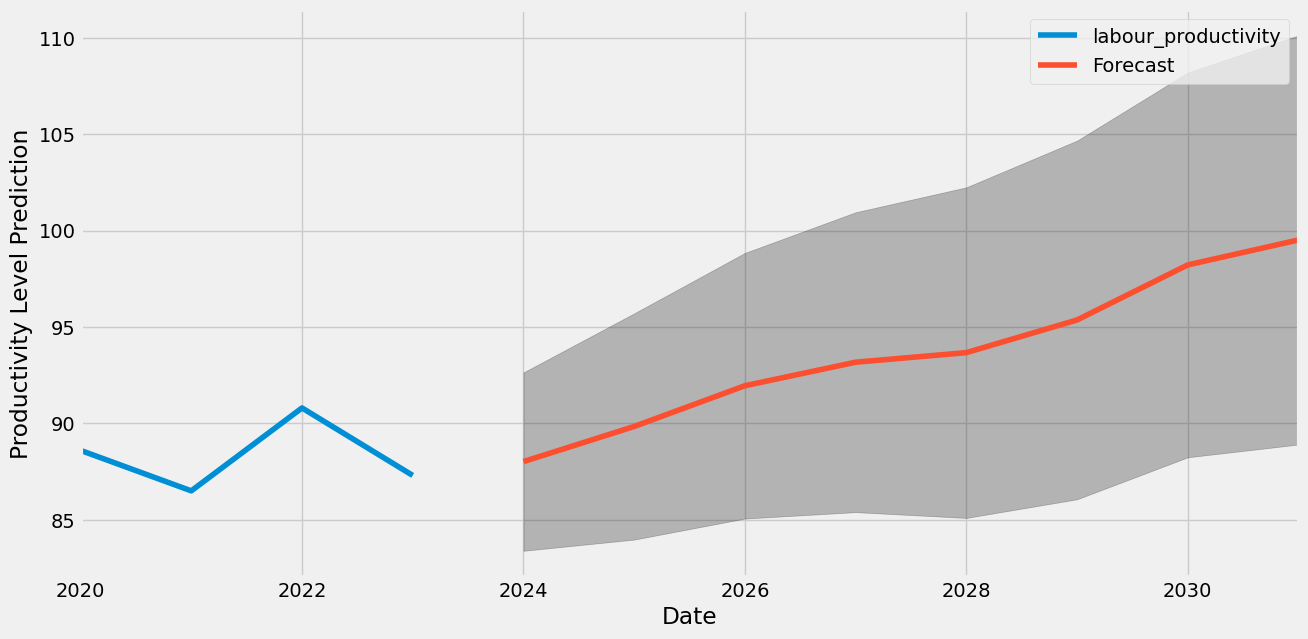

In [26]:
#Productivity data prediction
PD_model = sm.tsa.statespace.SARIMAX(productivity_data1,
                                order = (0, 1, 1),
                                seasonal_order = (1, 1, 1, 12),
                                enforce_invertibility = False)
PD_results = PD_model.fit()
print(PD_results.summary().tables[1])


PD_pred_uc = PD_results.get_forecast(steps=8)
PD_pred_ci = PD_pred_uc.conf_int()
ax = productivity_data1['2020':].plot(label='observed', figsize=(14, 7))
PD_pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(PD_pred_ci.index,
                PD_pred_ci.iloc[:, 0],
                PD_pred_ci.iloc[:, 1], color='k', alpha=.25)
PD_prediction = round(PD_pred_uc.predicted_mean,2)
ax.set_xlabel('Date')
ax.set_ylabel('Productivity Level Prediction')
plt.legend()
plt.show()

18:10:38 - cmdstanpy - INFO - Chain [1] start processing
18:10:38 - cmdstanpy - INFO - Chain [1] done processing


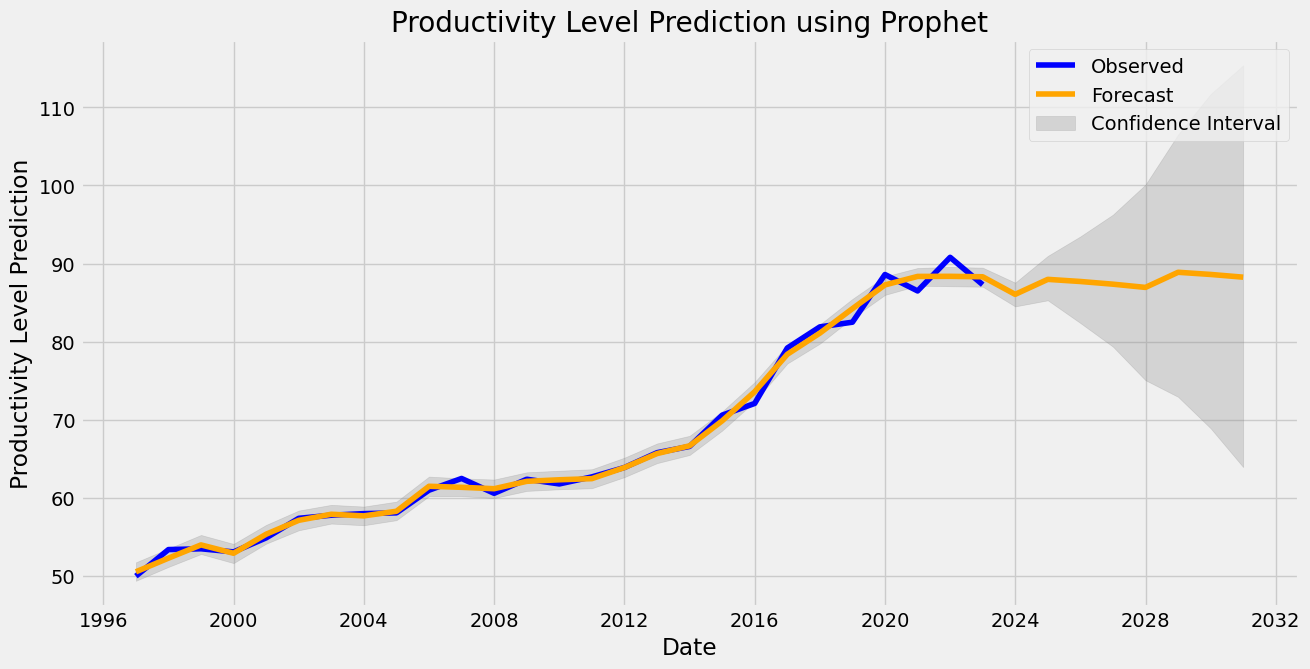

           ds   yhat  yhat_lower  yhat_upper
27 2023-12-31  86.06       84.52       87.56
28 2024-12-31  87.98       85.30       90.98
29 2025-12-31  87.71       82.40       93.47
30 2026-12-31  87.37       79.37       96.25
31 2027-12-31  86.95       75.08      100.10
32 2028-12-31  88.89       72.95      106.51
33 2029-12-31  88.61       68.92      111.69
34 2030-12-31  88.26       63.96      115.37


In [127]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Ensure `productivity_data1` is in DataFrame format with columns 'ds' and 'y'
# If `productivity_data1` is a Series, we convert it to a DataFrame
if isinstance(productivity_data1, pd.Series):
    productivity_df = productivity_data1.reset_index()  # Convert Series to DataFrame
    productivity_df.columns = ['ds', 'y']  # Renaming columns to Prophet's requirements
else:
    productivity_df = productivity_data1.copy()
    # Rename columns to 'ds' and 'y' if not already, assuming the first column is date
    if productivity_df.shape[1] == 1:
        productivity_df.columns = ['y']
        productivity_df['ds'] = productivity_df.index  # Set index as date column
    elif productivity_df.shape[1] >= 2:
        productivity_df.columns = ['ds', 'y']
    
    # Ensure 'ds' column is in datetime format
    productivity_df['ds'] = pd.to_datetime(productivity_df['ds'])

# Initialize a Prophet model with desired parameters
prod_model = Prophet(
    growth='linear',  
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.5,
    seasonality_prior_scale=10.0,
    n_changepoints=15,
    changepoint_range=0.9
)

# Fit the model
prod_model.fit(productivity_df[['ds', 'y']])

# Create a future DataFrame for 8 steps ahead (assuming monthly data)
future = prod_model.make_future_dataframe(periods=8, freq='Y')

# Forecast
prod_forecast = prod_model.predict(future)

# Plot the historical productivity data and forecast
fig = plt.figure(figsize=(14, 7))
plt.plot(productivity_df['ds'], productivity_df['y'], label='Observed', color='blue')

# Plot the forecasted productivity values
plt.plot(prod_forecast['ds'], prod_forecast['yhat'], label='Forecast', color='orange')

# Fill the confidence intervals with a different color
plt.fill_between(prod_forecast['ds'], 
                 prod_forecast['yhat_lower'], 
                 prod_forecast['yhat_upper'], 
                 color='gray', alpha=0.25, label='Confidence Interval')

# Set titles and labels
plt.title('Productivity Level Prediction using Prophet')
plt.xlabel('Date')
plt.ylabel('Productivity Level Prediction')
plt.legend()
plt.show()

# Print summary of predictions
PD_prediction = prod_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(8).round(2)
print(PD_prediction)


In [135]:
from sklearn.metrics import r2_score

actual = productivity_df['y']  # Your actual values
predicted = prod_forecast['yhat'][:len(actual)]  # Take predictions for the existing data length

r2 = r2_score(actual, predicted)
print(f"R-squared: {r2:.2f}")

R-squared: 0.99


/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.44679D+00    |proj g|=  1.33688D+00

At iterate    5    f=  8.10360D+00    |proj g|=  5.22895D-02

At iterate   10    f=  8.10163D+00    |proj g|=  5.71244D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     14      1     0     0   1.444D-04   8.102D+00
  F =   8.1016304176869767     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025    

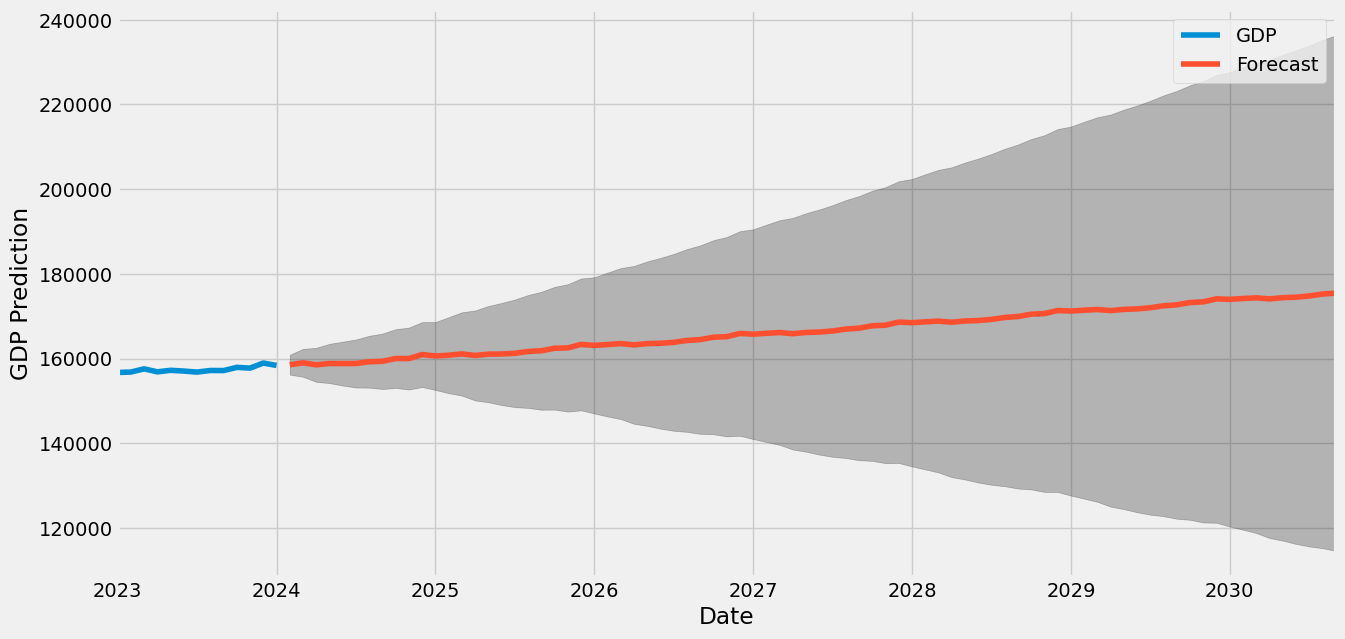

In [27]:
#GDP data prediction
GDP_model = sm.tsa.statespace.SARIMAX(gdp1,
                                order = (0, 1, 1),
                                seasonal_order = (1, 1, 1, 12),
                                enforce_invertibility = False)
GDP_results = GDP_model.fit()
print(GDP_results.summary().tables[1])


GDP_pred_uc = GDP_results.get_forecast(steps=80)
GDP_pred_ci = GDP_pred_uc.conf_int()
ax = gdp1['2023':].plot(label='observed', figsize=(14, 7))
GDP_pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(GDP_pred_ci.index,
                GDP_pred_ci.iloc[:, 0],
                GDP_pred_ci.iloc[:, 1], color='k', alpha=.25)
GDP_prediction = GDP_pred_uc.predicted_mean.round().astype(int)
ax.set_xlabel('Date')
ax.set_ylabel('GDP Prediction')
plt.legend()
plt.show()

17:50:11 - cmdstanpy - INFO - Chain [1] start processing
17:50:11 - cmdstanpy - INFO - Chain [1] done processing


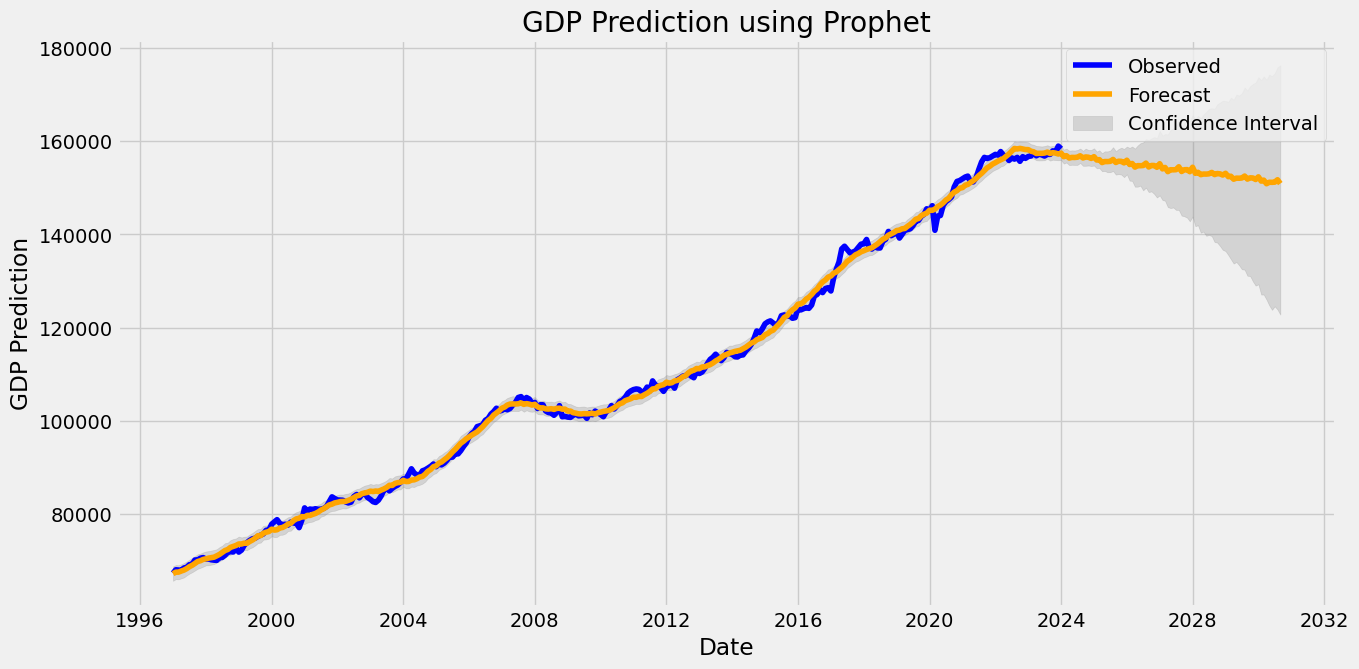

            ds       yhat  yhat_lower  yhat_upper
325 2024-01-31  156653.97   155172.01   158167.55
326 2024-02-29  156872.13   155415.42   158391.66
327 2024-03-31  156370.08   154858.52   157942.44
328 2024-04-30  156503.93   154928.73   158012.35
329 2024-05-31  156488.34   154901.92   157977.94
330 2024-06-30  156545.74   154904.81   158089.45
331 2024-07-31  156854.90   155321.52   158403.44
332 2024-08-31  156381.56   154707.75   157913.88
333 2024-09-30  156605.59   154707.93   158381.43
334 2024-10-31  156537.51   154766.93   158086.16
335 2024-11-30  156281.80   154656.50   158093.76
336 2024-12-31  156662.16   154765.41   158453.26
337 2025-01-31  155932.37   154169.06   157753.29
338 2025-02-28  156032.52   154239.32   158024.22
339 2025-03-31  155396.09   153546.82   157395.67
340 2025-04-30  155620.44   153596.06   157802.31
341 2025-05-31  155604.31   153324.99   157787.94
342 2025-06-30  155653.07   153339.85   157974.66
343 2025-07-31  156068.12   153592.05   158688.29


In [98]:
from prophet import Prophet
# Assuming gdp1 is a Pandas Series with a DateTime index
# Convert the Series to a DataFrame
gdp_df = gdp1.reset_index()
gdp_df.columns = ['ds', 'y']  # Rename columns to fit Prophet's requirements

# Create a Prophet model with default parameters
GDP_model = Prophet(
    growth='linear',  # You can change to 'logistic' if needed
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='additive',
    changepoint_prior_scale=0.5,
    seasonality_prior_scale=10.0,
    n_changepoints=10,
    changepoint_range=0.95
)

# Fit the model
GDP_model.fit(gdp_df)

# Make future dataframe for 80 steps ahead (monthly)
future = GDP_model.make_future_dataframe(periods=80, freq='M')

# Forecast
GDP_forecast = GDP_model.predict(future)

# Plot the historical data
fig = plt.figure(figsize=(14, 7))
plt.plot(gdp_df['ds'], gdp_df['y'], label='Observed', color='blue')

# Plot the forecasted values
plt.plot(GDP_forecast['ds'], GDP_forecast['yhat'], label='Forecast', color='orange')

# Fill the uncertainty intervals in a different color
plt.fill_between(GDP_forecast['ds'], 
                 GDP_forecast['yhat_lower'], 
                 GDP_forecast['yhat_upper'], 
                 color='gray', alpha=0.25, label='Confidence Interval')

# Set titles and labels
plt.title('GDP Prediction using Prophet')
plt.xlabel('Date')
plt.ylabel('GDP Prediction')
plt.legend()
plt.show()

# Print summary of predictions
GDP_prediction = round(GDP_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], 2)
print(GDP_prediction.tail(80))  # Display the last 80 predicted values


/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/usmanali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.69810D+00    |proj g|=  1.45747D+00

At iterate    5    f=  1.55218D+00    |proj g|=  3.54852D-02

At iterate   10    f=  1.52902D+00    |proj g|=  3.77060D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     15      1     0     0   6.466D-06   1.529D+00
  F =   1.5290074944919858     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025    

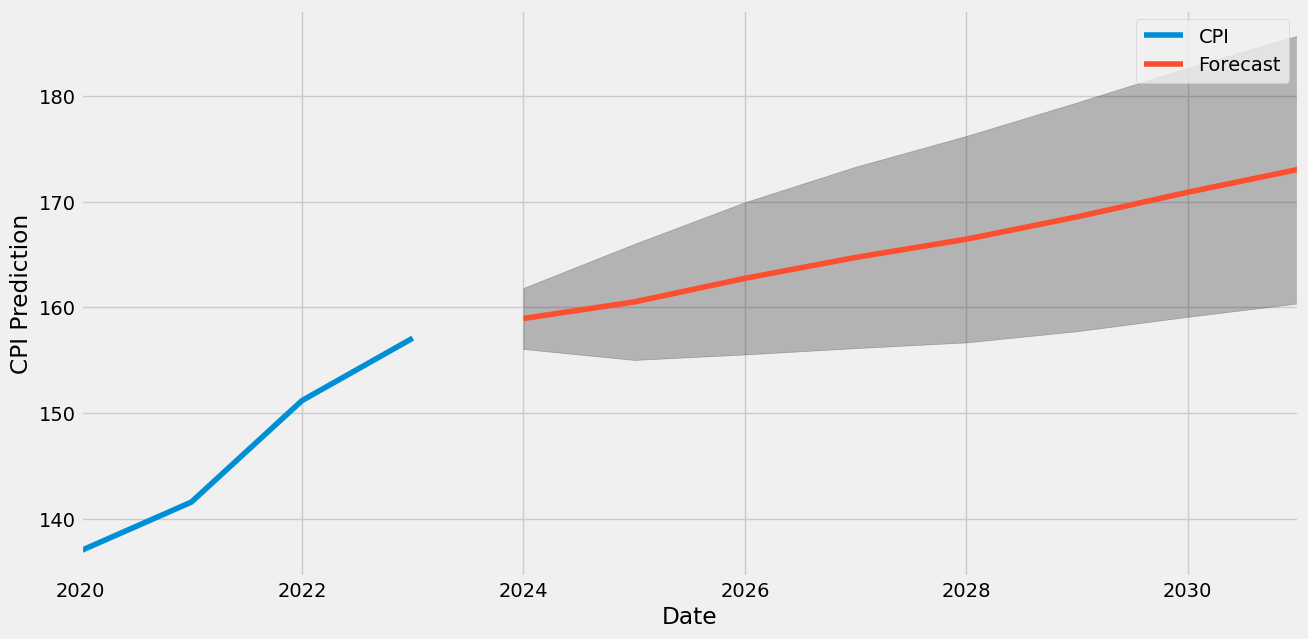

In [28]:
#CPI data prediction
CPI_model = sm.tsa.statespace.SARIMAX(cpi1,
                                order = (0, 1, 1),
                                seasonal_order = (1, 1, 1, 12),
                                enforce_invertibility = False)
CPI_results = CPI_model.fit()
print(CPI_results.summary().tables[1])


CPI_pred_uc = CPI_results.get_forecast(steps=8)
CPI_pred_ci = CPI_pred_uc.conf_int()
ax = cpi1['2020':].plot(label='observed', figsize=(14, 7))
CPI_pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(CPI_pred_ci.index,
                CPI_pred_ci.iloc[:, 0],
                CPI_pred_ci.iloc[:, 1], color='k', alpha=.25)
CPI_prediction = round(CPI_pred_uc.predicted_mean,2)
ax.set_xlabel('Date')
ax.set_ylabel('CPI Prediction')
plt.legend()
plt.show()

17:48:24 - cmdstanpy - INFO - Chain [1] start processing
17:48:24 - cmdstanpy - INFO - Chain [1] done processing


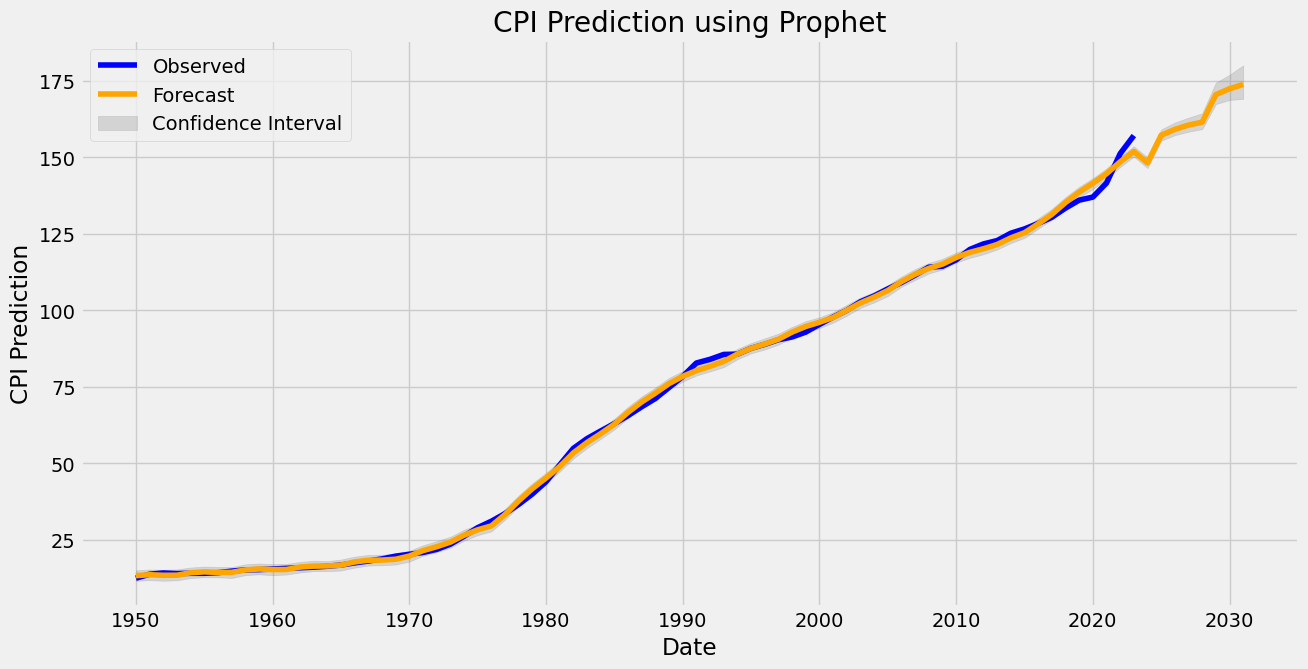

           ds    yhat  yhat_lower  yhat_upper
74 2023-12-31  148.19      146.45      149.99
75 2024-12-31  157.21      155.41      159.09
76 2025-12-31  159.12      157.24      161.35
77 2026-12-31  160.54      158.36      162.95
78 2027-12-31  161.47      159.20      164.38
79 2028-12-31  170.48      167.39      174.40
80 2029-12-31  172.39      168.73      176.96
81 2030-12-31  173.81      169.10      180.04


In [95]:
cpi_df = cpi1.reset_index()
cpi_df.columns = ['ds', 'y']  # Rename columns to match Prophet's requirements

# Initialize a Prophet model
CPI_model = Prophet(
    growth='linear',  # Choose 'linear' for gradual change or 'logistic' for plateau
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='additive',
    changepoint_prior_scale=0.5,
    seasonality_prior_scale=10.0,
    n_changepoints=10,
    changepoint_range=0.9
)

# Fit the model
CPI_model.fit(cpi_df)

# Create a future DataFrame for 8 steps ahead (assuming monthly data)
future = CPI_model.make_future_dataframe(periods=8, freq='Y')

# Forecast
CPI_forecast = CPI_model.predict(future)

# Plot the historical data
fig = plt.figure(figsize=(14, 7))
plt.plot(cpi_df['ds'], cpi_df['y'], label='Observed', color='blue')

# Plot the forecasted values
plt.plot(CPI_forecast['ds'], CPI_forecast['yhat'], label='Forecast', color='orange')

# Fill the uncertainty intervals in a different color
plt.fill_between(CPI_forecast['ds'], 
                 CPI_forecast['yhat_lower'], 
                 CPI_forecast['yhat_upper'], 
                 color='gray', alpha=0.25, label='Confidence Interval')

# Set titles and labels
plt.title('CPI Prediction using Prophet')
plt.xlabel('Date')
plt.ylabel('CPI Prediction')
plt.legend()
plt.show()

# Print summary of predictions
CPI_prediction = CPI_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(8).round(2)
print(CPI_prediction)


In [136]:
from sklearn.metrics import r2_score

actual = cpi_df['y']  # Your actual values
predicted = CPI_forecast['yhat'][:len(actual)]  # Take predictions for the existing data length

r2 = r2_score(actual, predicted)
print(f"R-squared: {r2:.2f}")

R-squared: 1.00
